<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    PROGRAMMING FOR DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA PREPROCESSING AND EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

---

## Đọc dữ liệu vào dataframe
Dữ liệu: [Red Wine Quality](https://www.kaggle.com/api/v1/datasets/download/uciml/red-wine-quality-cortez-et-al-2009).
Theo mô tả về bộ dữ liệu [Red Wine Quality Description](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data):
> Mục tiêu: xây dựng mô hình dự đoán chất lượng cảm quan (sensory quality) của rượu vang dựa trên các thông số hóa lý.
> 
> Bộ dữ liệu này bao gồm:
> * Số mẫu (records): 1,599
> * Số thuộc tính (features): 12 (bao gồm các thông số hóa lý và nhãn chất lượng)
> 
> Bộ dữ liệu bao gồm 11 thuộc tính đầu vào, cụ thể như sau:  
> * Fixed acidity: Độ axit cố định
> * Volatile acidity: Độ axit dễ bay hơi
> * Citric acid: Hàm lượng axit citric
> * Residual sugar: Hàm lượng đường còn lại
> * Chlorides: Hàm lượng chloride
> * Free sulfur dioxide: Lượng lưu huỳnh dioxide tự do
> * Total sulfur dioxide: Tổng lượng lưu huỳnh dioxide
> * Density: Khối lượng riêng
> * pH: Độ pH
> * Sulphates: Hàm lượng sulphate
> * Alcohol: Nồng độ cồn

In [2]:
# Cài đặt các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Đọc dữ liệu từ tệp winequality-red.csv vào khung dữ liệu red_wine_quality_df
red_wine_quality_df = pd.read_csv('../Datasets/winequality-red.csv')

# In một số mẫu
red_wine_quality_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Có bao nhiêu cột và dòng?

In [ ]:
# Số hàng và cột dữ liệu
print("Rows and columns:", red_wine_quality_df.shape)

# Lấy số lượng mẫu và số lượng thuộc tính
n_rows = red_wine_quality_df.shape[0]
n_cols = red_wine_quality_df.shape[1]

# In số lượng mẫu và số lượng thuộc tính
print("Rows:", n_rows)
print("Columns:", n_cols)

Rows and columns: (1599, 12)
Rows: 1599
Columns: 12


## Khám phá về các dòng trong bộ dữ liệu.

### Ý nghĩa của từng dòng?
Mỗi dòng sử dụng là 1 mẫu rượu vang đỏ. Đầu vào bao gồm các thử nghiệm khách quan (ví dụ: giá trị PH) và đầu ra dựa trên dữ liệu cảm quan (trung bình của ít nhất 3 đánh giá do các chuyên gia về rượu thực hiện). Mỗi chuyên gia đánh giá chất lượng rượu từ 0 (rất kém) đến 10 (rất tuyệt vời).  
### Có dòng bị trùng lặp không?  

In [6]:
# Tìm số dòng trùng lặp
print("Duplicated rows:",red_wine_quality_df.duplicated().sum())

Duplicated rows: 240


Vậy có 240 dòng trùng lặp. Ta cần xóa những dòng trùng lặp đó.

In [8]:
# Xóa các dòng trùng lặp
red_wine_quality_df.drop_duplicates(inplace=True)

Kiểm tra lại dữ liệu có còn trùng lặp hay không.

In [9]:
print("Duplicated rows:",red_wine_quality_df.duplicated().sum())

Duplicated rows: 0


Các dòng trùng lặp đã bị xóa. Tiếp theo chúng ta sẽ khám phá các cột.

## Khám phá về từng cột (các thuộc tính) trong bộ dữ liệu.


### Ý nghĩa của từng cột?  

| Thuộc tính              | Ý nghĩa                                                       | Đơn vị      | Vai trò                                                | Dạng dữ liệu  | Tính chất    |
|--------------------------|--------------------------------------------------------------|-------------|--------------------------------------------------------|--------------|--------------|
| Fixed acidity           | Độ axit cố định (axit không bay hơi, như axit tartaric)      | g/dm³       | Tạo vị chua và cấu trúc của rượu                      | Numeric        | Continuous   |
| Volatile acidity        | Độ axit dễ bay hơi (chủ yếu là axit axetic)                  | g/dm³       | Ảnh hưởng đến mùi, hàm lượng cao gây mùi giấm         | Numeric        | Continuous   |
| Citric acid             | Hàm lượng axit citric                                        | g/dm³       | Tăng cảm giác tươi mới và cân bằng vị chua            | Numeric        | Continuous   |
| Residual sugar          | Lượng đường còn lại sau quá trình lên men                   | g/dm³       | Quyết định độ ngọt và khả năng bảo quản               | Numeric        | Continuous   |
| Chlorides               | Hàm lượng chloride (muối)                                    | g/dm³       | Ảnh hưởng đến vị mặn, mức cao làm giảm chất lượng     | Numeric        | Continuous   |
| Free sulfur dioxide     | Lưu huỳnh dioxide tự do                                      | mg/dm³      | Chống oxy hóa và vi khuẩn                             | Numeric        | Discrete   |
| Total sulfur dioxide    | Tổng lượng lưu huỳnh dioxide                                 | mg/dm³      | Ảnh hưởng đến độ ổn định và bảo quản rượu             | Numeric        | Discrete   |
| Density                 | Khối lượng riêng của rượu so với nước                        | kg/m³       | Phản ánh lượng đường và cồn                           | Numeric        | Continuous   |
| pH                      | Độ pH của rượu                                               | Không có    | Đo độ axit, ảnh hưởng đến tuổi thọ và hương vị        | Numeric        | Continuous   |
| Sulphates               | Hàm lượng sulphate (muối của axit sulfuric)                 | g/dm³       | Góp phần tạo cảm giác chát nhẹ và giữ ổn định chất lượng | Numeric        | Continuous   |
| Alcohol                 | Nồng độ cồn (ethanol)                                        | % (thể tích)| Quyết định độ đậm đà và cảm giác rượu khi uống        | Numeric        | Continuous   |
| Quality                 | Điểm đánh giá chất lượng cảm quan của rượu vang             | Không có    | Thước đo chất lượng rượu tổng thể                    | Numeric      | Ordinal    |



Dạng dữ liệu của tất cả các cột đều là numeric nên ta không cần xử lí đối với dạng dữ liệu categorical.

### Kiểu dữ liệu của từng cột là gì?

In [10]:
# Tìm kiểu dữ liệu của các thuộc tính
red_wine_quality_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Có kiểu dữ liệu nào không thích hợp không?
Các kiểu dữ liệu đã thích hợp nhưng giá trị của một số cột có vẻ hơi dài nên ta nên làm tròn đến số thập phân thứ 2.

In [11]:
# Làm tròn giá trị của các thuộc tính đến 2 chữ số thập phân
red_wine_quality_df = red_wine_quality_df.round(2)
red_wine_quality_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.00,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.08,13.0,40.0,1.00,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.07,15.0,59.0,1.00,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.06,15.0,21.0,0.99,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.07,9.0,18.0,1.00,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.07,17.0,102.0,1.00,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.10,15.0,65.0,1.00,3.28,0.54,9.2,5


## Đối với mỗi cột có kiểu dữ liệu numeric, các giá trị được phân bổ như thế nào?
Ở đây thì tất cả các cột đều là dữ liệu numeric. Chúng ta cần xem có bao nhiêu giá trị bị thiếu trong các cột.

In [12]:
np.sum(np.isnan(red_wine_quality_df), axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
# Phần trăm tỉ lệ bị thiếu của mỗi thuộc tính
def missing_ratio(col):
    return np.mean(col.isnull())*100

missing_values = red_wine_quality_df.apply(missing_ratio, axis=0)
missing_values.round(2)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Không có giá trị nào bị thiếu trong tất cả các cột số. Chúng ta sẽ tính giá trị min, Q1(25%), median, Q3(75%) và max của các cột số này.

In [13]:
# Tính toán các giá trị thống kê: min, Q1, median, Q3, max cho tất cả các cột số
summary_stats = red_wine_quality_df.describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]

summary_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,4.6,0.12,0.00,0.9,0.01,1.0,6.0,0.99,2.74,0.33,8.4,3.0
25%,7.1,0.39,0.09,1.9,0.07,7.0,22.0,1.00,3.21,0.55,9.5,5.0
50%,7.9,0.52,0.26,2.2,0.08,14.0,38.0,1.00,3.31,0.62,10.2,6.0
75%,9.2,0.64,0.43,2.6,0.09,21.0,63.0,1.00,3.40,0.73,11.1,6.0
max,15.9,1.58,1.00,15.5,0.61,72.0,289.0,1.00,4.01,2.00,14.9,8.0


## <font color=red> Lưu xuống file dữ liệu mới sau tiền xử lí để chuẩn bị cho phần câu hỏi </font>

In [16]:
red_wine_quality_df.to_csv('../Datasets/processed-redwine-quality.csv', index = False)

## Đặt một số câu hỏi để khám phá dữ liệu.

### Câu hỏi 1: Các mối quan hệ tương quan giữa các thuộc tính trong bộ dữ liệu red wine quality như thế nào? 

**Các bước thực hiện:**
- Bước 1: Tính ma trận tương quan: sử dụng thư viện 'pandas' để tính toán ma trận tương quan.
- Bước 2: Vẽ biểu đồ heatmap: Sử dụng thư viện 'mathplotlib' và 'seaborn' để vẽ biểu đồ từ ma trận tương quan.
- Bước 3: Từ quan sát biểu đồ, đưa ra những nhận xét về sự tương quan giữa các thuộc tính.

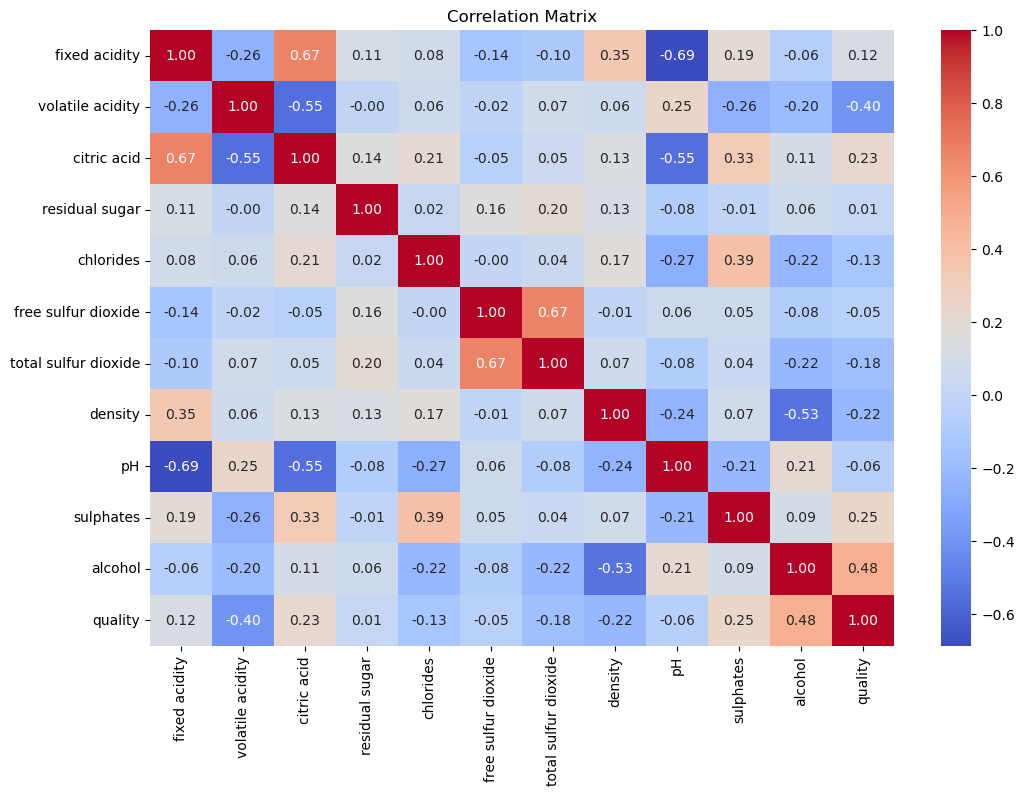

In [17]:
# Tải lại dữ liệu đã xử lý
red_wine_quality_df = pd.read_csv('../Datasets/processed-redwine-quality.csv')

# Tính toán ma trận tương quan giữa các thuộc tính
correlation_matrix = red_wine_quality_df.corr()

# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Nhận xét::**
- **Tương quan mạnh (|r| > 0.5):**
    - `fixed acidity` và `citric acid` (0.67)
    - `free sulfur dioxide` và `total sulfur dioxide` (0.67)

- **Tương quan yếu (0.1 < |r| ≤ 0.5):**
    - `alcohol` và `quality` (0.48)
    - `sulphates` và `quality` (0.25)
    - `volatile acidity` và `quality` (-0.40)
    - `pH` và `fixed acidity` (-0.69)
    - `pH` và `citric acid` (-0.55)
    - `density` và `alcohol` (-0.53)

- **Không có mối liên hệ (|r| ≤ 0.1):**
    - `residual sugar` và `quality` (0.01)
    - `chlorides` và `quality` (-0.13)
    - `density` và `quality` (-0.22)

**Kết luận:** Khi phân tích sâu hơn, hãy tập trung vào các cặp thuộc tính có mối tương quan mạnh và vừa.

### Câu hỏi 2: Các mối quan hệ cặp (pairwise relationships) giữa các thuộc tính của bộ dữ liệu red wine quality có xu hướng như thế nào?

**Các bước thực hiện:**
- Bước 1: Vẽ biểu đồ pairplot: Sử dụng thư viện 'seaborn' để vẽ biểu đồ.
- Bước 2: Quan sát và phân tích:
    - Dựa trên biểu đồ, quan sát mối quan hệ giữa các cặp thuộc tính.
    - Đặc biệt chú ý đến phân nhóm theo quality (nếu có).

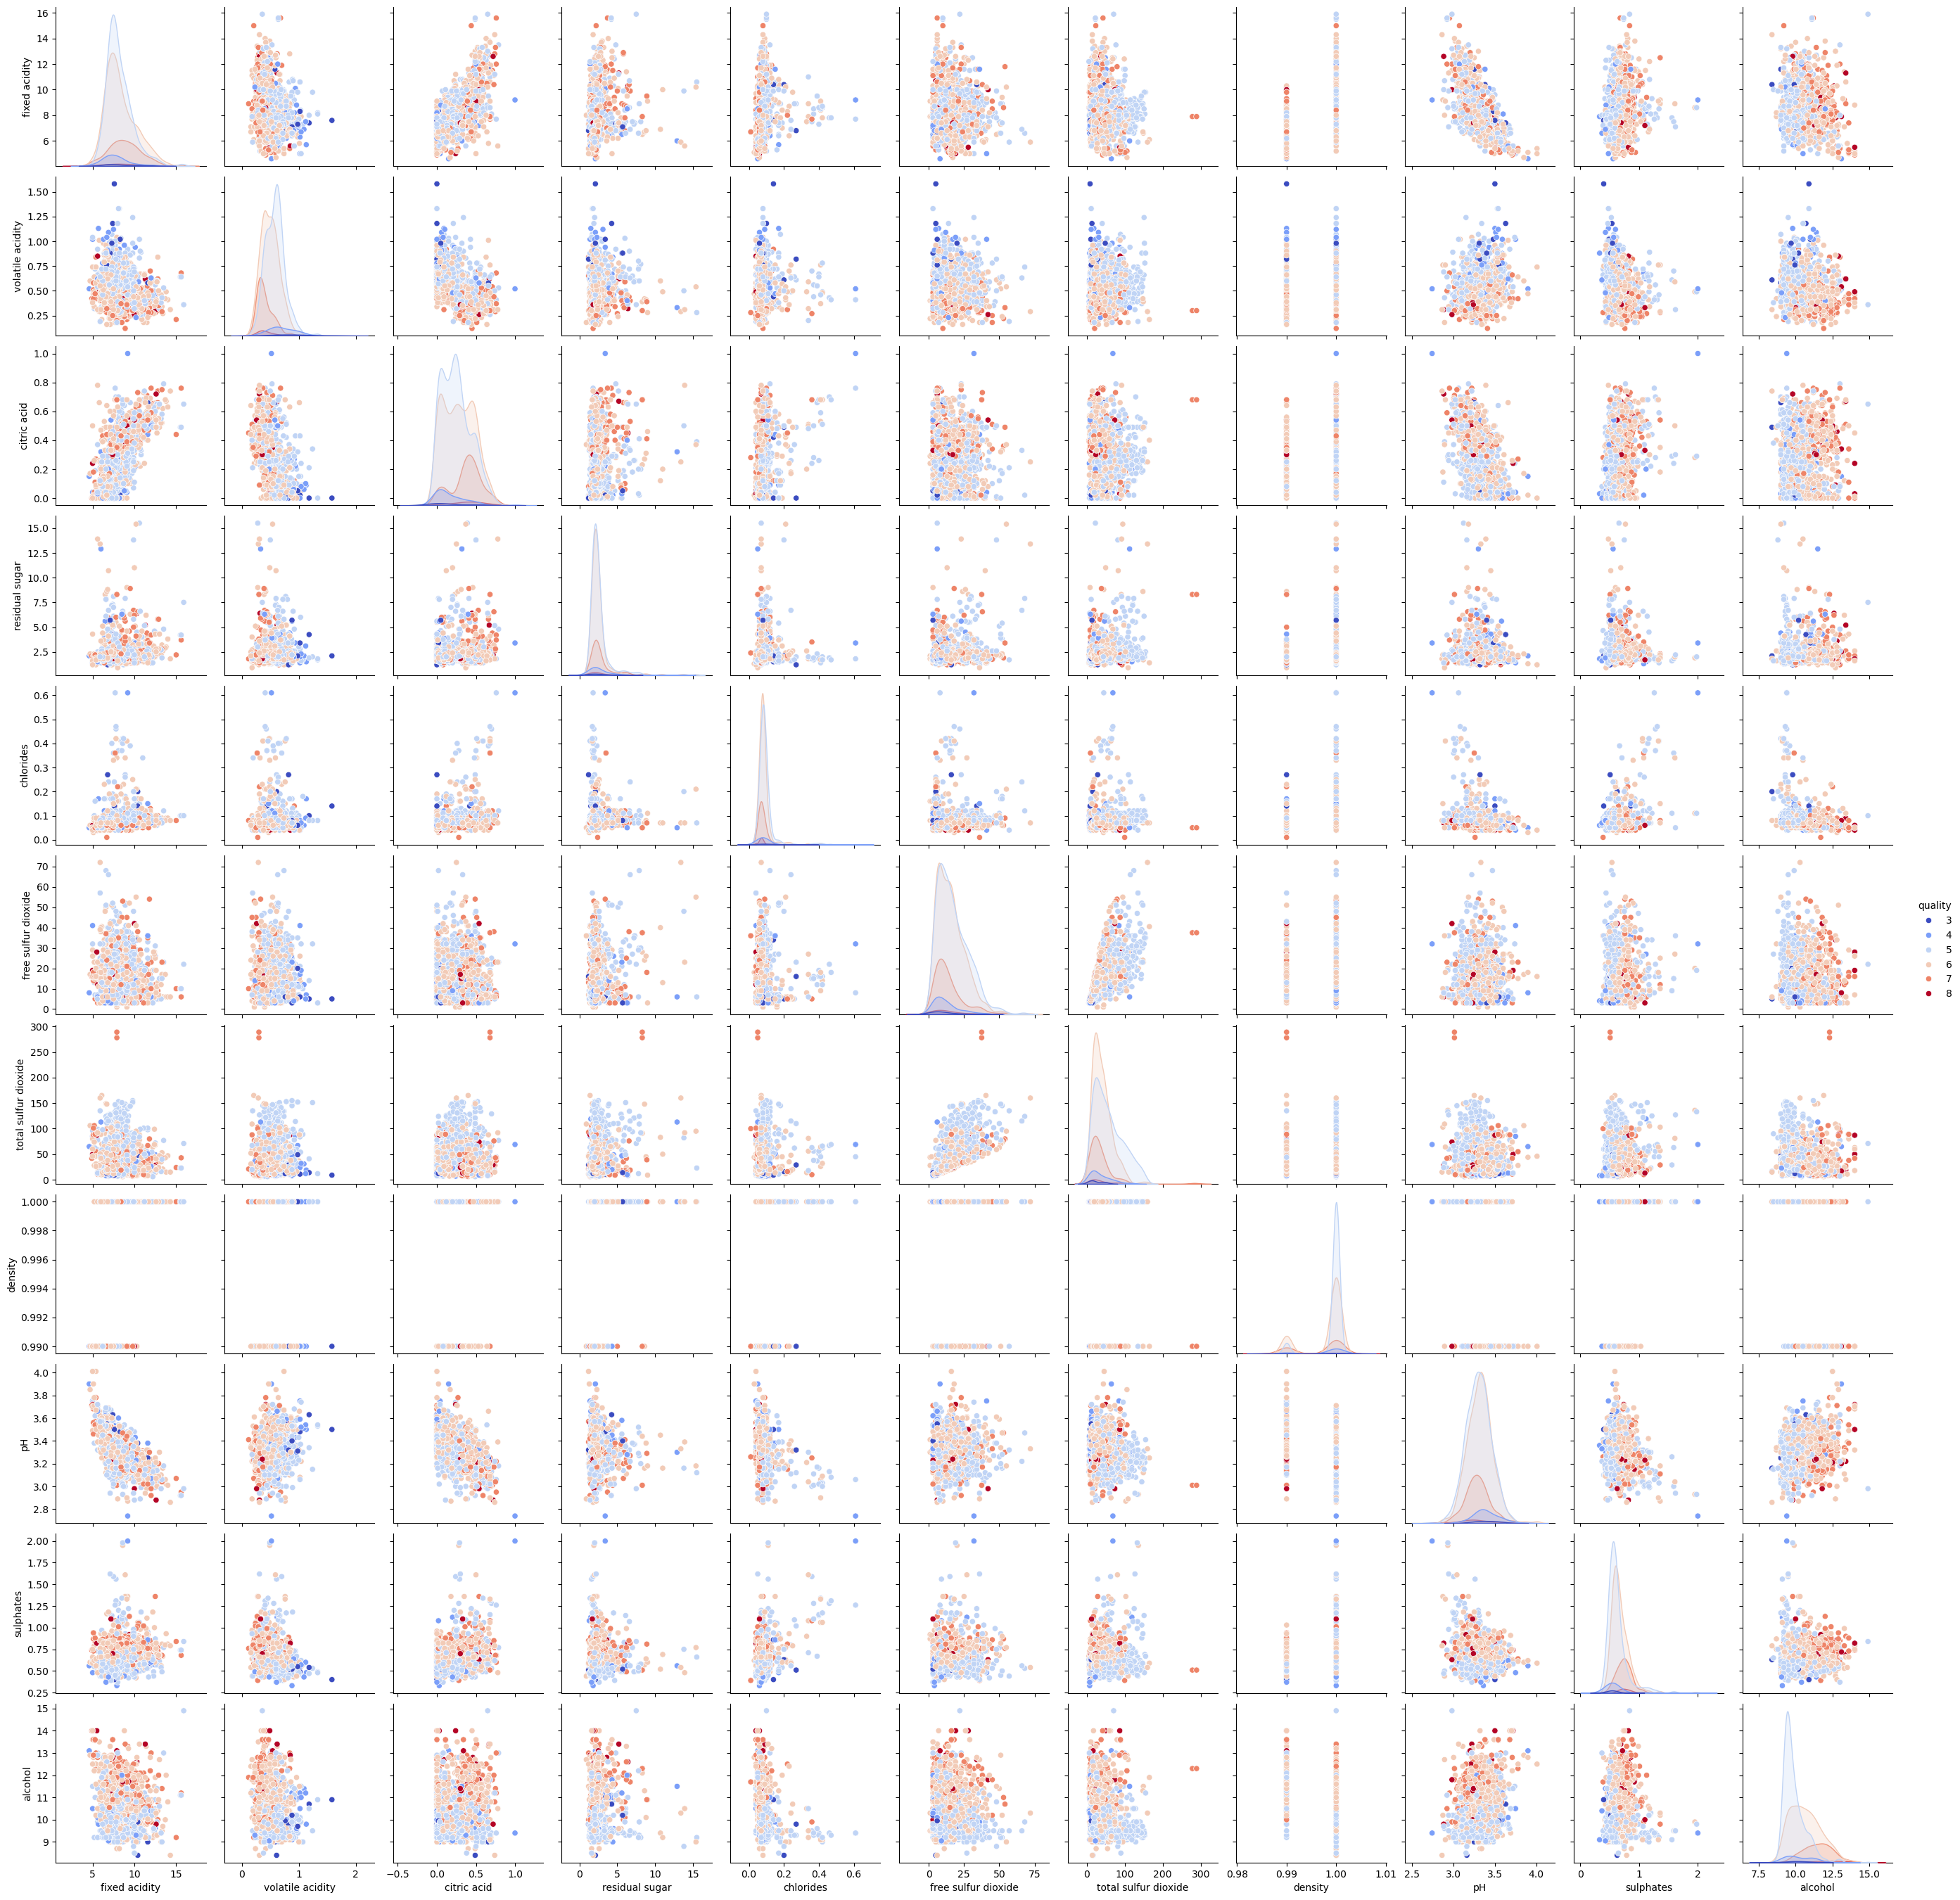

In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(red_wine_quality_df, diag_kind='kde', hue='quality', palette='coolwarm')
plt.show()

**Nhận xét:**

- **Thuộc tính quan trọng với chất lượng:**
   - **Alcohol**: Rượu có nồng độ cồn cao thường có chất lượng cao.
   - **Sulphates**: Lượng sulphates cao hơn thường liên quan đến chất lượng tốt hơn.
   - **Volatile Acidity**: Axit bay hơi thấp hơn thì chất lượng rượu cao hơn.

- **Thuộc tính ít ảnh hưởng:**
   - **Residual Sugar**, **Density**, và **pH**: Không có sự phân hóa rõ ràng giữa các nhóm chất lượng.

- **Mối quan hệ giữa các cặp thuộc tính:**
   - **Free Sulfur Dioxide** và **Total Sulfur Dioxide**: Liên hệ tuyến tính dương rõ ràng.
   - **Fixed Acidity** và **Citric Acid**: Có mối quan hệ dương mạnh.

**Kết luận:** Chất lượng rượu chủ yếu bị ảnh hưởng bởi **alcohol**, **sulphates**, và **volatile acidity**.

### Câu hỏi 3: Trong bộ dữ liệu, nhóm rượu có chất lượng nào xuất hiện nhiều nhất?

**Các bước thực hiện:**
- Bước 1: Kiểm tra khoảng giá trị của cột `quality`: Xác định giá trị nhỏ nhất và lớn nhất trong cột quality để biết các mức chất lượng rượu có trong dữ liệu.
- Bước 2: Vẽ biểu đồ Histogram cho cột `quality`: Sử dụng biểu đồ histogram để trực quan hóa số lượng rượu tương ứng với từng mức chất lượng.
- Bước 3: Thêm cột phân loại (`quality_label`): Phân nhóm rượu dựa trên quality thành 3 loại: "Low", "Medium", "High".
- Bước 4: Vẽ biểu đồ tròn cho cột `quality_label`': Trực quan hóa tỷ lệ phần trăm các nhóm Low, Medium, và High.
- Bước 5: Nhận xét và đánh giá: 
    - Mức chất lượng rượu nào chiếm ưu thế.
    - Đưa ra đánh giá về sự phân bố các mức chất lượng.

(min, max) = (3, 8)


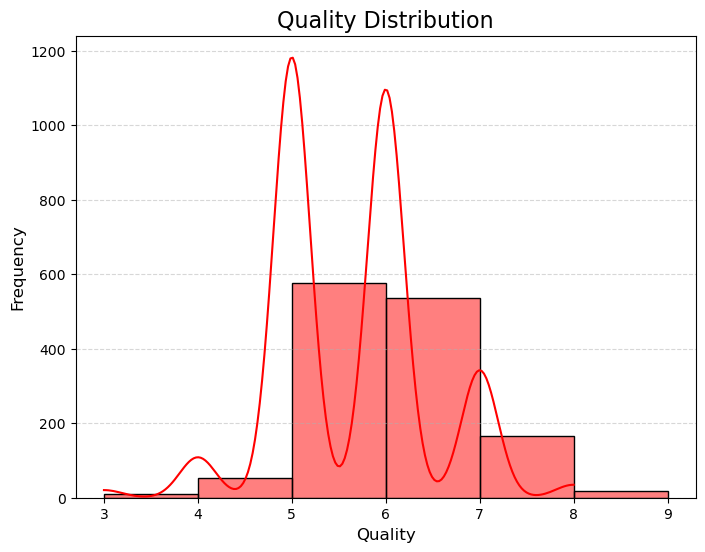

In [30]:
# Xem khoảng giá trị của cột quality
print(f'(min, max) = ({red_wine_quality_df["quality"].min()}, {red_wine_quality_df["quality"].max()})')

# Vẽ biểu đồ histogram cho cột quality
plt.figure(figsize=(8, 6))
sns.histplot(red_wine_quality_df['quality'], bins=range(red_wine_quality_df['quality'].min(), red_wine_quality_df['quality'].max() + 2), kde=True, color='red', edgecolor='black')
plt.title('Quality Distribution', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Nhận xét:**
- **Phân bố:** Chất lượng rượu tập trung nhiều nhất ở mức **5** và **6** (trung bình).  
- **Rượu ít xuất hiện:** Các mức thấp (3, 4) và cao (7, 8) chiếm tỉ lệ nhỏ.  

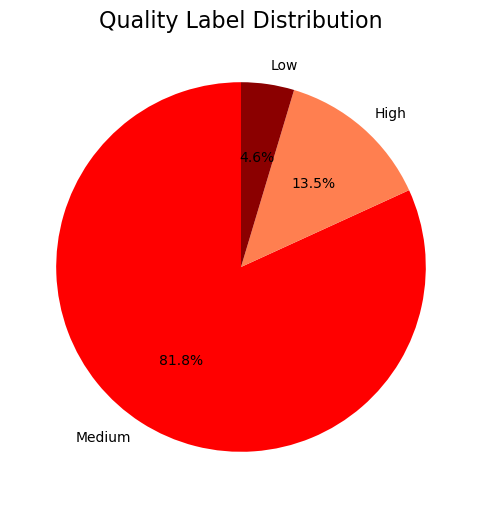

In [32]:
# Thêm cột quality_label vào red_wine_quality_df
def label_quality(quality):
    if quality <= 4:
        return 'Low'
    elif quality <= 6:
        return 'Medium'
    else:
        return 'High'

red_wine_quality_df['quality_label'] = red_wine_quality_df['quality'].apply(label_quality)

# Vẽ biểu đồ tròn cho cột quality_label
plt.figure(figsize=(8, 6))
red_wine_quality_df['quality_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['red', 'coral', 'darkred'])
plt.title('Quality Label Distribution', fontsize=16)
plt.ylabel('')
plt.show()

**Nhận xét:**
   - Nhóm **Medium** (chất lượng trung bình) chiếm tỷ lệ lớn nhất, khoảng **81.8%**.
   - Nhóm **High** (chất lượng cao) chiếm **13.5%**.
   - Nhóm **Low** (chất lượng thấp) chỉ chiếm **4.6%**.
   
**Kết luận:** Rượu chất lượng trung bình là phổ biến nhất trong bộ dữ liệu.